In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline    

In [6]:
housing = pd.read_csv("house_train.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

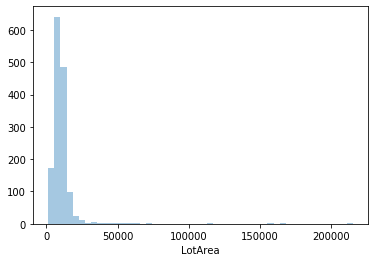

In [10]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=False);

Most of the data is shifted to left. the rarely seen data in right is called **Outliers**

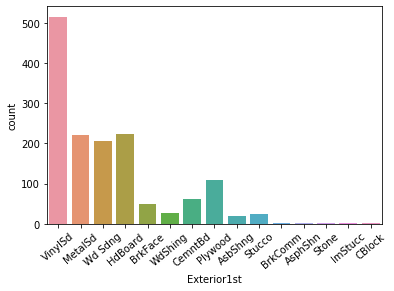

In [11]:
# What are the different types of housing exterios

plot = sns.countplot(x = "Exterior1st", data = housing)    #countplot for bar chart
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);   #Rotates the xticks by 40 deg

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

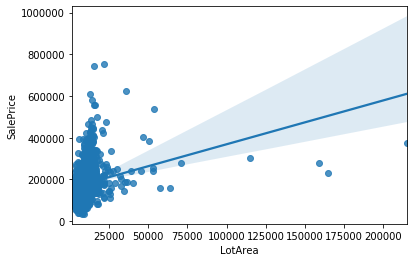

In [12]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)     #regression plot

In [11]:
# Are outliers skewing the relationship.. Redraw the relationshp after removing very large values
housing["LotArea"].quantile([0.1,0.5,0.95,0.98,0.99])   #Takes the 
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)] #removes outliers

0.10     5000.00
0.50     9478.50
0.95    17401.15
0.98    25251.62
0.99    37567.64
Name: LotArea, dtype: float64

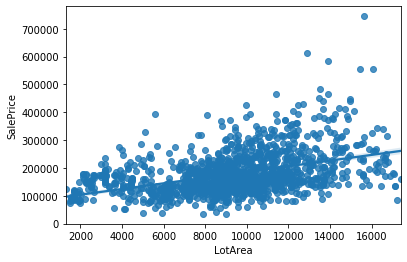

In [9]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)



In [81]:
housing["LotArea"].corr(housing["SalePrice"])    #correlation between lot area and sales price WITH outliers
corrlot = housing_sub["LotArea"].corr(housing_sub["SalePrice"])    #correlation between lot area and sales price WITHOUT outliers
corrlot

0.2638433538714056

0.430209991289777

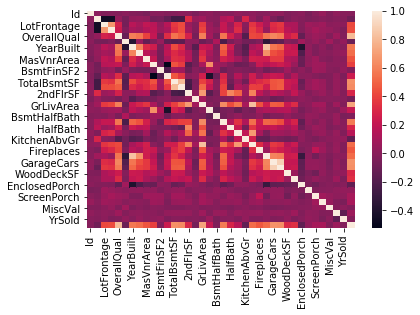

In [93]:
plot = sns.heatmap(housing_sub[housing.select_dtypes(['int64','float64']).columns].corr())   #Plot heatmaps from corr

### Plotting multiple graphs
Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [14]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [16]:
print(len(sf_cols))
sf_cols


9


['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

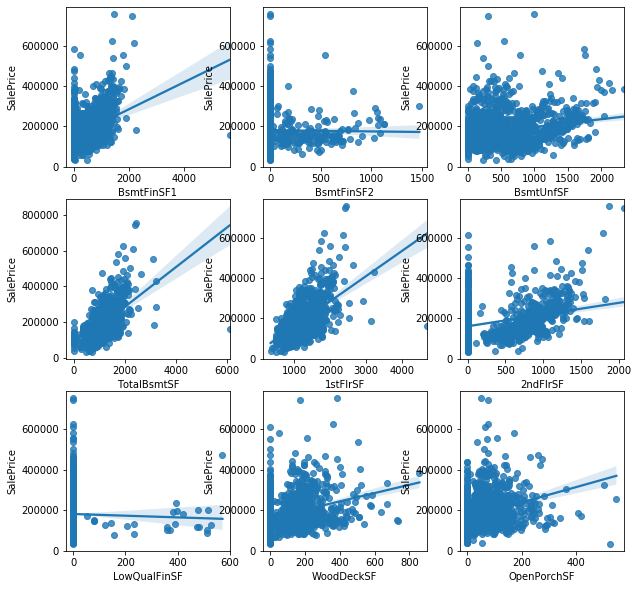

In [20]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))    #Code for plotting the canvas
for i in range(0, len(sf_cols)):
    #Below code is used to access each plot in canvas
    rows = i // 3   #0 0 0 
    cols = i % 3    #0 1 2 
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [21]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

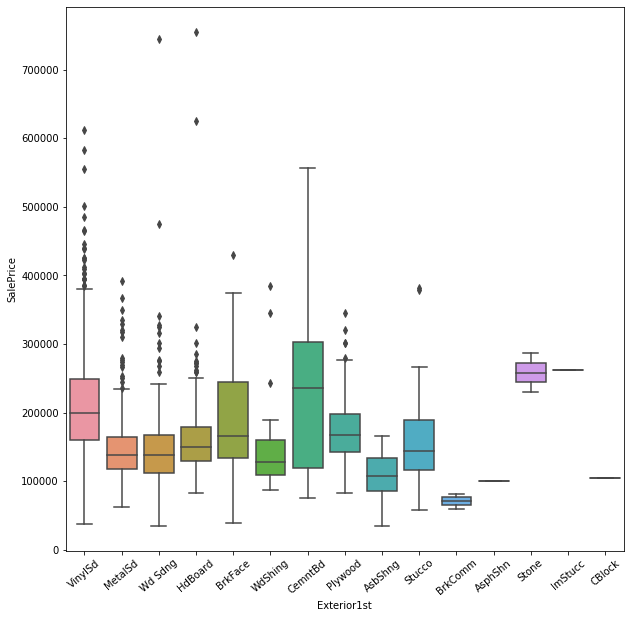

In [26]:
fig, axs = plt.subplots(figsize = (10,10))
plot = sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

The dots in the above box plots are the **OUTLIERS**
Length of the box represents the number of houses using that specific material (X axis)


**Rather than plotting the relationship between all the different types of Exterior, do the following:**

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns


In [65]:
top_3_exterior = list(housing["Exterior1st"].value_counts().keys())[0:3]   #.keys() is used to get the keys in values count
#Ususally values counts comes in decreasing order. So we use it to get the top 3
top_3_exterior

['VinylSd', 'HdBoard', 'MetalSd']

In [67]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")

In [72]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

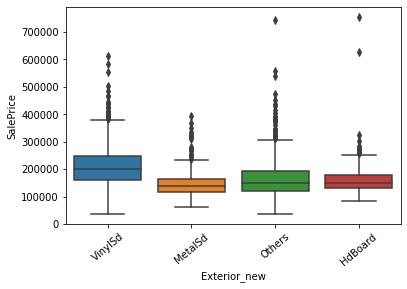

In [31]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [32]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")

In [33]:
housing["new_house"].value_counts()

Old    1096
New     364
Name: new_house, dtype: int64

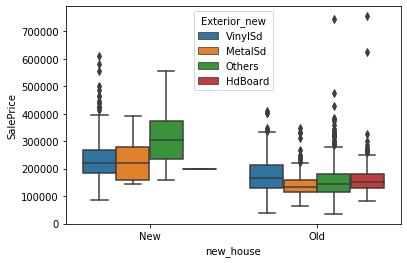

In [74]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);  

In [35]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>



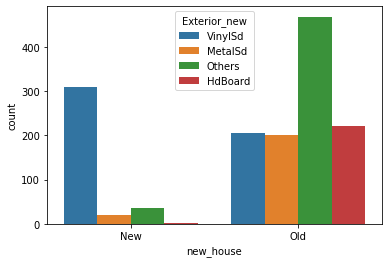

In [36]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");